### 🟤 EDA Bronze — Análise Inicial dos Dados Brutos

Este notebook mostra uma **primeira exploração dos dados na camada Bronze**, ainda **sem nenhuma limpeza**.  
O objetivo é entender:
- Tipos de dados em cada tabela
- A granularidade de cada tabela
- A presença de duplicados
- A cobertura (quantos clientes aparecem em cada fonte)
- O nível de valores ausentes
- Distribuições iniciais de variáveis importantes

Essa análise serve como **motivador** para a consolidação e transformação posterior (camada Silver).

#### **1. Importando as bibliotecas necessárias**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from acessar_dados_raw import acessar_csv_s3
from io import StringIO
import boto3
import os

#### **2. Consultando os dados na camada Bronze e armazenando em DataFrames**

In [3]:
arquivos = ['telemetria_11','telemetria_6','nps_transacional_onboarding','dados_clientes','telemetria_4','historico',
            'telemetria_5','telemetria_7','nps_transacional_implantacao','telemetria_9','nps_transacional_suporte',
            'telemetria_3','telemetria_8','telemetria_10','clientes_desde','mrr','nps_relacional','telemetria_2',
            'nps_transacional_aquisicao','contratacoes_ultimos_12_meses','tickets','telemetria_1','nps_transacional_produto']

bucket = 'arcana-fiap'

dataframes = {}

for arquivo in arquivos:
    
    print(f"Acessando arquivo: {arquivo}")
    df = acessar_csv_s3(bucket, arquivo)

    if df is not None:
        dataframes[arquivo] = df
    

print("Todos os arquivos foram acessados com sucesso!")

Acessando arquivo: telemetria_11
Acessando arquivo: telemetria_6
Acessando arquivo: nps_transacional_onboarding
Acessando arquivo: dados_clientes
Acessando arquivo: telemetria_4
Acessando arquivo: historico
Acessando arquivo: telemetria_5
Acessando arquivo: telemetria_7
Acessando arquivo: nps_transacional_implantacao
Acessando arquivo: telemetria_9
Acessando arquivo: nps_transacional_suporte
Acessando arquivo: telemetria_3
Acessando arquivo: telemetria_8
Acessando arquivo: telemetria_10
Acessando arquivo: clientes_desde
Acessando arquivo: mrr
Acessando arquivo: nps_relacional
Acessando arquivo: telemetria_2
Acessando arquivo: nps_transacional_aquisicao
Acessando arquivo: contratacoes_ultimos_12_meses
Acessando arquivo: tickets
Acessando arquivo: telemetria_1
Acessando arquivo: nps_transacional_produto
Todos os arquivos foram acessados com sucesso!


In [6]:
df_telemetria_1 = dataframes.get('telemetria_1')
df_telemetria_2 = dataframes.get('telemetria_2')
df_telemetria_3 = dataframes.get('telemetria_3')
df_telemetria_4 = dataframes.get('telemetria_4')
df_telemetria_5 = dataframes.get('telemetria_5')
df_telemetria_6 = dataframes.get('telemetria_6')
df_telemetria_7 = dataframes.get('telemetria_7')
df_telemetria_8 = dataframes.get('telemetria_8')
df_telemetria_9 = dataframes.get('telemetria_9')
df_telemetria_10 = dataframes.get('telemetria_10')
df_telemetria_11 = dataframes.get('telemetria_11')
df_nps_transacional_onboarding = dataframes.get('nps_transacional_onboarding')
df_dados_clientes = dataframes.get('dados_clientes')
df_historico = dataframes.get('historico')
df_nps_transacional_implantacao = dataframes.get('nps_transacional_implantacao')
df_nps_transacional_suporte = dataframes.get('nps_transacional_suporte')
df_clientes_desde = dataframes.get('clientes_desde')
df_mrr = dataframes.get('mrr')
df_nps_relacional = dataframes.get('nps_relacional')
df_nps_transacional_aquisicao = dataframes.get('nps_transacional_aquisicao')
df_contratacoes_ultimos_12_meses = dataframes.get('contratacoes_ultimos_12_meses')
df_tickets = dataframes.get('tickets')
df_nps_transacional_produto = dataframes.get('nps_transacional_produto')

#### **3. Análise inicial dos dados**

In [8]:
df_telemetria_1.head()

,clienteid,eventduration,moduloid,productlineid,referencedatestart,slotid,statuslicenca,tcloud,clienteprime
0,TEXKCV00,580.724,6,2,2025-03-19,4133,Desconectado,NaN,NaN
1,TAAHTU00,414787.069,6,2,2025-03-19,4000,Desconectado,NaN,NaN
2,TEXKCV00,4933.511,6,2,2025-03-19,4133,Desconectado,NaN,NaN
3,TEWERU00,414086.474,7,2,2025-03-19,4000,Desconectado,NaN,NaN
4,TFDFHJ00,0.000,524,3,2025-03-19,0,Desconectado,NaN,NaN


In [10]:
df_telemetria_2.head()

,clienteid,eventduration,moduloid,productlineid,referencedatestart,slotid,statuslicenca,tcloud,clienteprime
0,TEZB6100,2.444188e+07,4093,2,2025-03-19,4001,Desconectado,NaN,NaN
1,TEZCXN00,1.913060e+02,5209,6,2025-03-19,0,Desconectado,NaN,NaN
2,T1057000,1.507410e+06,2,2,2025-03-19,4118,Desconectado,NaN,NaN
3,T3951200,4.516698e+05,2,2,2025-03-19,4118,Desconectado,NaN,NaN
4,T3793200,4.470604e+05,519,3,2025-03-19,4000,Desconectado,NaN,NaN


Como os schemas das tabelas telemetria_n são os mesmos, vamos realizar a união desses DataFrames visando facilitar as análises,. 

In [11]:
df_telemetria = pd.concat([df_telemetria_1, df_telemetria_2, df_telemetria_3, df_telemetria_4,
                           df_telemetria_5, df_telemetria_6, df_telemetria_7, df_telemetria_8,
                           df_telemetria_9, df_telemetria_10, df_telemetria_11], ignore_index=True)

Verificando os dados básicos de cada DataFrame:
- Tamanho da base;
- Tipos de dados das colunas;
- Percentual de dados nulos.

In [30]:
# Função auxiliar
def diagnostico_tabela(df, nome):
    print(f"\n===== {nome} =====")
    print("Shape:", df.shape)
    
    # Tipos de dados
    print("\nTipos de dados:")
    print(df.dtypes)
    
    # Missing
    print("\n% Missing por coluna:")
    print(df.isna().mean().round(2) * 100)
    
    # Valores únicos por coluna
    print("\nValores únicos por coluna:")
    unicos = df.nunique()
    print(unicos)

In [31]:
diagnostico_tabela(df_dados_clientes, "DADOS_CLIENTES")
diagnostico_tabela(df_clientes_desde, "CLIENTES_DESDE")
diagnostico_tabela(df_historico, "HISTORICO")
diagnostico_tabela(df_contratacoes_ultimos_12_meses, "CONTRATACOES_12M")
diagnostico_tabela(df_mrr, "MRR")
diagnostico_tabela(df_nps_relacional, "NPS_RELACIONAL")
diagnostico_tabela(df_nps_transacional_aquisicao, "NPS_AQUISICAO")
diagnostico_tabela(df_nps_transacional_implantacao, "NPS_IMPLANTACAO")
diagnostico_tabela(df_nps_transacional_onboarding, "NPS_ONBOARDING")
diagnostico_tabela(df_nps_transacional_suporte, "NPS_SUPORTE")
diagnostico_tabela(df_telemetria, "TELEMETRIA")
diagnostico_tabela(df_tickets, "TICKETS")


===== DADOS_CLIENTES =====
Shape: (238597, 16)

Tipos de dados:
ï»¿CD_CLIENTE             object
DS_PROD                   object
DS_LIN_REC                object
CIDADE                    object
DS_CNAE                   object
DS_SEGMENTO               object
DS_SUBSEGMENTO            object
FAT_FAIXA                 object
MARCA_TOTVS               object
MODAL_COMERC              object
PAIS                       int64
PERIODICIDADE             object
SITUACAO_CONTRATO         object
UF                        object
VL_TOTAL_CONTRATO         object
DT_ASSINATURA_CONTRATO    object
dtype: object

% Missing por coluna:
ï»¿CD_CLIENTE             0.0
DS_PROD                   0.0
DS_LIN_REC                0.0
CIDADE                    0.0
DS_CNAE                   0.0
DS_SEGMENTO               0.0
DS_SUBSEGMENTO            0.0
FAT_FAIXA                 0.0
MARCA_TOTVS               0.0
MODAL_COMERC              5.0
PAIS                      0.0
PERIODICIDADE             0.0
SITUACAO_C

Através do resultado anterior, é possivel identificar diversos pontos sobre nossos dados:

- **Nomes de colunas:** muitos campos possuem nomes com caracteres que podem dificultar a análise, além de não haver uma padronização.

- **Inconsistência de tipos:** muitos campos numéricos vieram como texto (VL_TOTAL_CONTRATO, VL_TOTAL, QTD) e datas como string.

- **Granularidade diversa:** as tabelas representam diferentes níveis de detalhe (cliente × produto, cliente único, cliente × proposta, cliente × evento, cliente × resposta de NPS).

- **Cobertura desigual:** algumas tabelas contemplam todos os clientes (DADOS_CLIENTES, CLIENTES_DESDE), enquanto outras cobrem apenas subconjuntos (MRR ~70% dos clientes, CONTRATACOES_12M ~40%, NPS variando de bases muito grandes como NPS_SUPORTE até bases muito pequenas como NPS_AQUISICAO/ONBOARDING).

- **Missing values relevantes:**

    - NPS complementares chegam a ter 40–60% de dados faltantes.

    - TELEMETRIA possui colunas 100% vazias (tcloud, clienteprime).

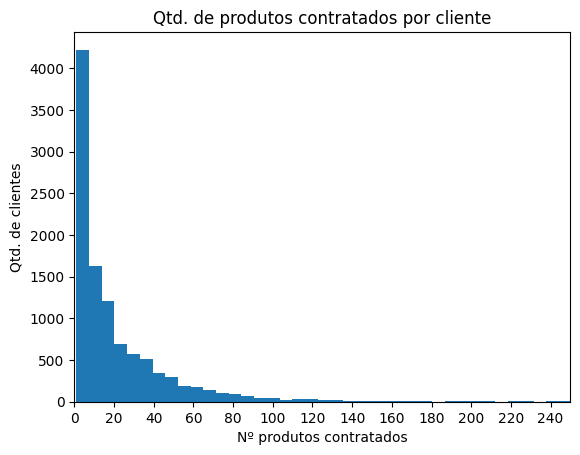

In [50]:
df_dados_clientes.groupby("ï»¿CD_CLIENTE").size().plot.hist(bins=100)
plt.title("Qtd. de produtos contratados por cliente")
plt.xlim(0, 250)
plt.xlabel("Nº produtos contratados")
plt.ylabel("Qtd. de clientes")

plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(20))
plt.show()

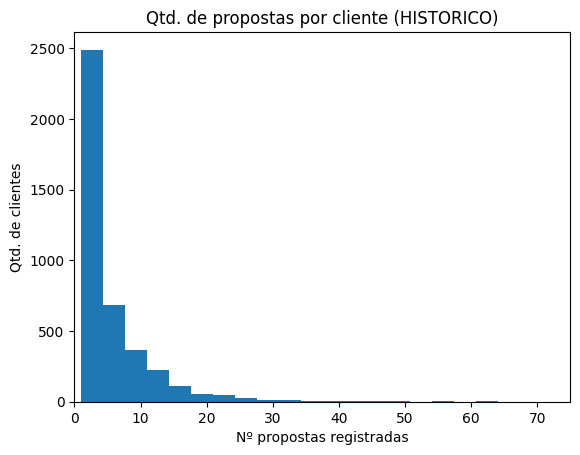

In [44]:
df_historico.groupby("CD_CLI").size().plot.hist(bins=50)
plt.title("Qtd. de propostas por cliente (HISTORICO)")
plt.xlim(0, 75)
plt.xlabel("Nº propostas registradas")
plt.ylabel("Qtd. de clientes")
plt.show()

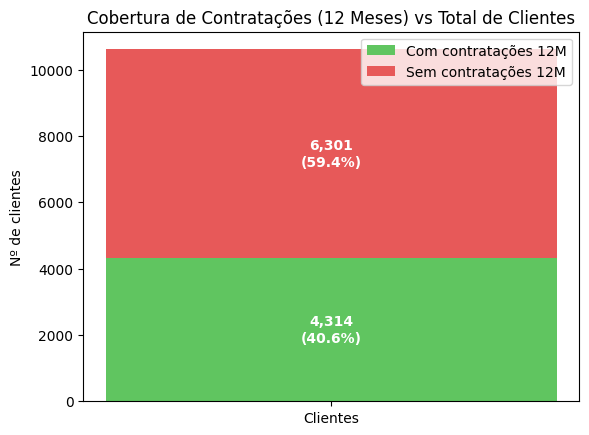

In [61]:
# Total de clientes
total_clientes = df_clientes_desde["ï»¿CLIENTE"].nunique()
contratacoes_clientes = df_contratacoes_ultimos_12_meses["ï»¿CD_CLIENTE"].nunique()
sem_contratacoes = total_clientes - contratacoes_clientes

# Valores
valores = [contratacoes_clientes, sem_contratacoes]
labels = ["Com contratações 12M", "Sem contratações 12M"]
cores = ["#60c560", "#e75959"]

# Gráfico de barras empilhadas
plt.bar(["Clientes"], [contratacoes_clientes], label=labels[0], color=cores[0])
plt.bar(["Clientes"], [sem_contratacoes], bottom=[contratacoes_clientes], label=labels[1], color=cores[1])

# Texto nas barras
plt.text(0, contratacoes_clientes/2, 
         f"{contratacoes_clientes:,}\n({contratacoes_clientes/total_clientes:.1%})",
         ha="center", va="center", color="white", fontsize=10, fontweight="bold")

plt.text(0, contratacoes_clientes + sem_contratacoes/2, 
         f"{sem_contratacoes:,}\n({sem_contratacoes/total_clientes:.1%})",
         ha="center", va="center", color="white", fontsize=10, fontweight="bold")


plt.title("Cobertura de Contratações (12 Meses) vs Total de Clientes")
plt.ylabel("Nº de clientes")
plt.legend()
plt.show()




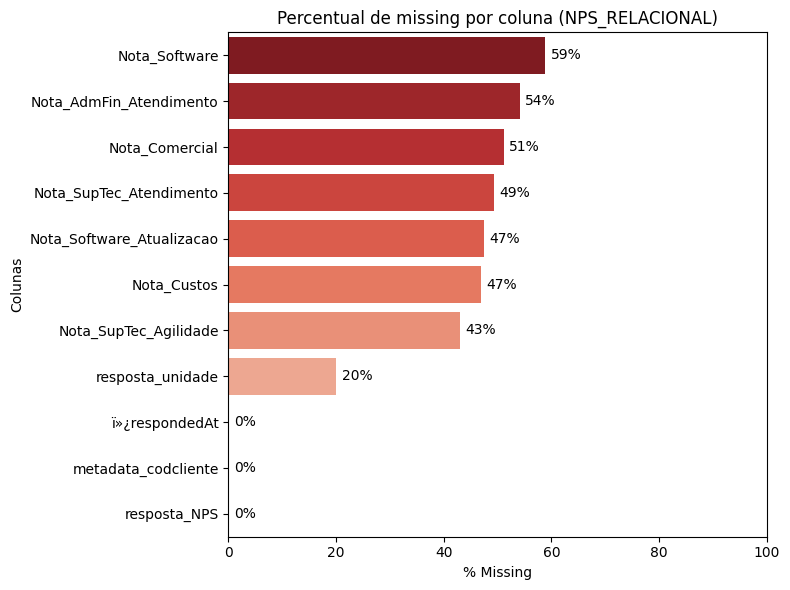

In [69]:
miss = df_nps_relacional.isna().mean().sort_values(ascending=False) * 100
plt.figure(figsize=(8,6))
sns.barplot(x=miss.values, y=miss.index, palette="Reds_r")

plt.title("Percentual de missing por coluna (NPS_RELACIONAL)")
plt.xlabel("% Missing")
plt.ylabel("Colunas")

# adiciona rótulos ao lado das barras
for i, v in enumerate(miss.values):
    plt.text(v + 1, i, f"{v:.0f}%", va="center")

plt.xlim(0, 100)  # escala fixa para clareza
plt.tight_layout()
plt.show()

In [72]:
df_dados_clientes.head()

,ï»¿CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO,VL_TOTAL_CONTRATO_NUM
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07,NaN
1,T00053,SMS COLAB NEO 2500 DOC,SMS TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,MANUFATURA - PARCEIRO,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,RJ,"341,155636978792",2015-02-27,NaN
2,T00053,HORA SUPORTE,CONSULTORIA TRADICIONAL,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,SERVICOS DE IMPLANTACAO,MODALIDADE SERVICOS NÃO RECORRENTES,105,00 - Mensal,CANCELADO,RJ,"45,3386017130146",1997-11-28,NaN
3,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07,NaN
4,T00053,PROGRESS USER 11 CDU,CDU TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,PROGRESS,MODALIDADE TRADICIONAL,105,00 - Mensal,TROCADO,RJ,"0,117708006301753",2017-11-22,NaN


In [73]:
s = (df_dados_clientes["VL_TOTAL_CONTRATO"]
       .astype(str).str.strip()
       .str.replace(".", "", regex=False)   # se houver ponto de milhar em alguns casos, remove
       .str.replace(",", ".", regex=False)) # vírgula decimal -> ponto

df_dados_clientes["VL_TOTAL_CONTRATO_NUM"] = pd.to_numeric(s, errors="coerce")


c:\Users\prado\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


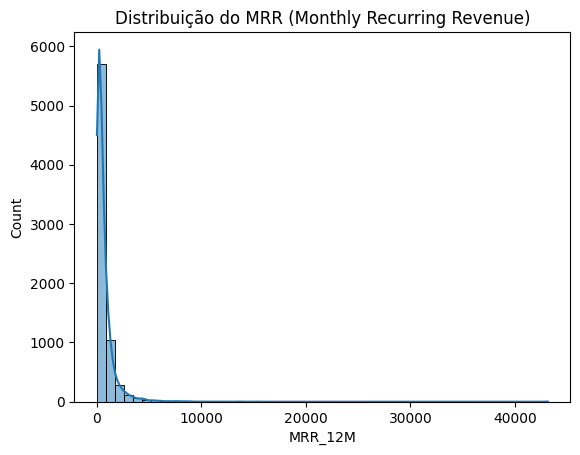

In [71]:
sns.histplot(df_mrr["MRR_12M"], bins=50, kde=True)
plt.title("Distribuição do MRR (Monthly Recurring Revenue)")
plt.xlabel("MRR_12M")
plt.show()

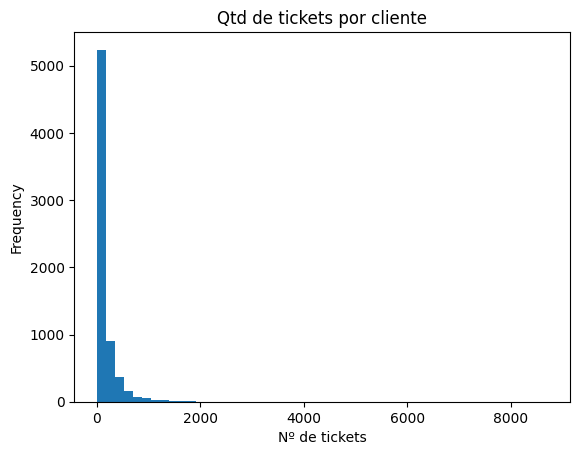

In [81]:
df_tickets["DT_CRIACAO"] = pd.to_datetime(df_tickets["DT_CRIACAO"], errors="coerce")
df_tickets["DT_ATUALIZACAO"] = pd.to_datetime(df_tickets["DT_ATUALIZACAO"], errors="coerce")
df_tickets["TEMPO_RESOLUCAO"] = (df_tickets["DT_ATUALIZACAO"] - df_tickets["DT_CRIACAO"]).dt.days

df_tickets.groupby("ï»¿CODIGO_ORGANIZACAO").size().plot.hist(bins=50)
plt.title("Qtd de tickets por cliente")
plt.xlabel("Nº de tickets")
plt.show()


c:\Users\prado\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


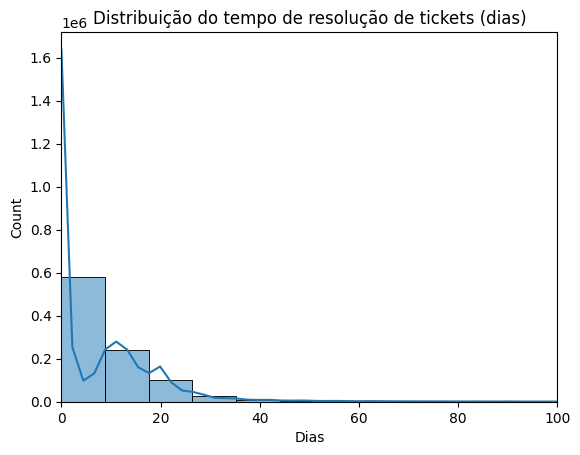

In [83]:
sns.histplot(df_tickets["TEMPO_RESOLUCAO"].dropna(), bins=50, kde=True)
plt.title("Distribuição do tempo de resolução de tickets (dias)")
plt.xlabel("Dias")
plt.xlim(0, 100)
plt.show()

Lista de códigos dos países: https://www38.receita.fazenda.gov.br/cadsincnac/jsp/coleta/ajuda/topicos/Tabela_VII_-_Paises.htm

In [1]:
codigos_paises = {
    13: "AFEGANISTAO",
    15: "ALAND, ILHAS",
    17: "ALBANIA, REPUBLICA DA",
    23: "ALEMANHA",
    31: "BURKINA FASO",
    37: "ANDORRA",
    40: "ANGOLA",
    41: "ANGUILLA",
    42: "ANTÁRTICA",
    43: "ANTIGUA E BARBUDA",
    53: "ARABIA SAUDITA",
    59: "ARGELIA",
    63: "ARGENTINA",
    64: "ARMENIA, REPUBLICA DA",
    65: "ARUBA",
    69: "AUSTRALIA",
    72: "AUSTRIA",
    73: "AZERBAIJAO, REPUBLICA DO",
    77: "BAHAMAS, ILHAS",
    80: "BAHREIN, ILHAS",
    81: "BANGLADESH",
    83: "BARBADOS",
    85: "BELARUS, REPUBLICA DA",
    87: "BELGICA",
    88: "BELIZE",
    90: "BERMUDAS",
    93: "MIANMAR (BIRMANIA)",
    97: "BOLIVIA, ESTADO PLURINACIONAL DA",
    98: "BOSNIA-HERZEGOVINA (REPUBLICA DA)",
    99: "BONAIRE, SAINT EUSTATIUS E SABA",
    101: "BOTSUANA",
    102: "BOUVET, ILHA",
    105: "BRASIL",
    108: "BRUNEI",
    111: "BULGARIA, REPUBLICA DA",
    115: "BURUNDI",
    119: "BUTAO",
    127: "CABO VERDE, REPUBLICA DE",
    137: "CAYMAN, ILHAS",
    141: "CAMBOJA",
    145: "CAMAROES",
    149: "CANADA",
    153: "CAZAQUISTAO, REPUBLICA DO",
    154: "CATAR",
    158: "CHILE",
    160: "CHINA, REPUBLICA POPULAR",
    161: "FORMOSA (TAIWAN)",
    163: "CHIPRE",
    165: "COCOS(KEELING),ILHAS",
    169: "COLOMBIA",
    173: "COMORES, ILHAS",
    177: "CONGO",
    183: "COOK, ILHAS",
    187: "COREIA (DO NORTE), REP.POP.DEMOCRATICA",
    190: "CORÉIA, REPÚBLICA DA",
    193: "COSTA DO MARFIM",
    195: "CROACIA (REPUBLICA DA)",
    196: "COSTA RICA",
    198: "COVEITE",
    199: "CUBA",
    200: "CURACAO",
    229: "BENIN",
    232: "DINAMARCA",
    235: "DOMINICA, ILHA",
    239: "ECUADOR",
    240: "EGITO",
    243: "ERITREIA",
    244: "EMIRADOS ÁRABES UNIDOS",
    245: "ESPANHA",
    246: "ESLOVÊNIA, REPÚBLICA DA",
    247: "ESLOVACA, REPÚBLICA DA",
    249: "ESTADOS UNIDOS",
    251: "ESTÔNIA, REPÚBLICA DA",
    253: "ETIÓPIA",
    255: "FALKLAND (ILHAS MALVINAS)",
    259: "FEROE, ILHAS",
    267: "FILIPINAS",
    271: "FINLÂNDIA",
    275: "FRANÇA",
    281: "GABÃO",
    285: "GAMBIA",
    289: "GANA",
    291: "GEORGIA, REPÚBLICA DA",
    292: "GEÓRGIA DO SUL E SANDWICH DO SUL, ILHAS",
    293: "GIBRALTAR",
    297: "GRANADA",
    301: "GRÉCIA",
    305: "GROELÃNDIA",
    309: "GUADALUPE",
    313: "GUAM",
    317: "GUATEMALA",
    321: "GUERNSEY",
    325: "GUIANA FRANCESA",
    329: "GUINÉ",
    334: "GUINÉ-BISSAU",
    331: "GUINÉ-EQUATORIAL",
    337: "GUIANA",
    341: "HAITI",
    343: "HEARD E ILHAS MCDONALD, ILHA",
    345: "HONDURAS",
    351: "HONG KONG",
    355: "HUNGRIA, REPUBLICA DA",
    357: "IEMEN",
    359: "MAN, ILHA DE",
    361: "ÍNDIA",
    365: "INDONÉSIA",
    369: "IRAQUE",
    372: "IRÃ, REPUBLICA ISLÂMICA DO",
    375: "IRLANDA",
    379: "ISLÂNDIA",
    383: "ISRAEL",
    386: "ITÁLIA",
    391: "JAMAICA",
    393: "JERSEY",
    399: "JAPÃO",
    403: "JORDÂNIA",
    411: "KIRIBATI",
    420: "LAOS, REP.POP.DEMOCR.DO",
    426: "LESOTO",
    427: "LETÔNIA, REPÚBLICA DA",
    431: "LÍBANO",
    434: "LIBÉRIA",
    438: "LÍBIA",
    440: "LIECHTENSTEIN",
    442: "LITUÂNIA, REPÚBLICA DA",
    445: "LUXEMBURGO",
    447: "MACAU",
    449: "MACEDÔNIA, ANT.REP.IUGOSLAVA",
    450: "MADAGASCAR",
    455: "MALÁSIA",
    458: "MALAVI",
    461: "MALDIVAS",
    464: "MALI",
    467: "MALTA",
    472: "MARIANAS DO NORTE",
    474: "MARROCOS",
    476: "MARSHALL, ILHAS",
    477: "MARTINICA",
    485: "MAURÍCIO",
    488: "MAURITÂNIA",
    489: "MAYOTTE",
    493: "MEXICO",
    494: "MOLDAVIA, REPÚBLICA DA",
    495: "MÔNACO",
    497: "MONGÓLIA",
    498: "MONTENEGRO",
    499: "MICRONÉSIA",
    501: "MONTSERRAT, ILHAS",
    505: "MOÇAMBIQUE",
    507: "NAMÍBIA",
    508: "NAURU",
    511: "CHRISTMAS,ILHA (NAVIDAD)",
    517: "NEPAL",
    521: "NICARÁGUA",
    525: "NIGER",
    528: "NIGÉRIA",
    531: "NIUE, ILHA",
    535: "NORFOLK, ILHA",
    538: "NORUEGA",
    542: "NOVA CALEDÔNIA",
    545: "PAPUA NOVA GUINÉ",
    548: "NOVA ZELÂNDIA",
    551: "VANUATU",
    556: "OMÃ",
    566: "PACIFICO, ILHAS DO (POSSESSAO DOS EUA)",
    573: "PAÍSES BAIXOS (HOLANDA)",
    575: "PALAU",
    576: "PAQUISTÃO",
    578: "PALESTINA",
    580: "PANAMÁ",
    586: "PARAGUAI",
    589: "PERU",
    593: "PITCAIRN, ILHA DE",
    599: "POLINÉSIA FRANCESA",
    603: "POLÔNIA, REPÚBLICA DA",
    607: "PORTUGAL",
    611: "PORTO RICO",
    623: "QUÊNIA",
    625: "QUIRGUIZ, REPÚBLICA DA",
    628: "REINO UNIDO",
    640: "REPÚBLICA CENTRO-AFRICANA",
    647: "REPÚBLICA DOMINICANA",
    660: "REUNIÃO, ILHA",
    665: "ZIMBABUE",
    670: "ROMÊNIA",
    675: "RUANDA",
    676: "RUSSIA, FEDERAÇÃO DA",
    677: "SALOMÃO, ILHAS",
    685: "SAARA OCIDENTAL",
    687: "EL SALVADOR",
    690: "SAMOA",
    691: "SAMOA AMERICANA",
    693: "SAO BARTOLOMEU",
    695: "SÃO CRISTOVÃO E NEVES, ILHAS",
    697: "SAN MARINO",
    698: "SÃO MARTINHO, ILHA DE (PARTE FRANCESA)",
    699: "SÃO MARTINHO, ILHA DE (PARTE HOLANDESA)",
    700: "SÃO PEDRO E MIQUELON",
    705: "SÃO VICENTE E GRANADINAS",
    710: "SANTA HELENA",
    715: "SANTA LÚCIA",
    720: "SÃO TOMÉ E PRÍNCIPE, ILHAS",
    728: "SENEGAL",
    731: "SEYCHELLES",
    735: "SERRA LEOA",
    737: "SERVIA",
    741: "CINGAPURA",
    744: "SÍRIA, REPÚBLICA ARABE DA",
    748: "SOMÁLIA",
    750: "SRI LANKA",
    754: "SUAZILÂNDIA",
    755: "SVALBARD E JAN MAYEN",
    756: "AFRICA DO SUL",
    759: "SUDÃO",
    760: "SUDAO DO SUL",
    764: "SUÉCIA",
    767: "SUÍCA",
    770: "SURINAME",
    772: "TADJIQUISTÃO, REPÚBLICA DO",
    776: "TAILÂNDIA",
    780: "TANZANIA, REP. UNIDA DA",
    781: "TERRAS AUSTRAIS FRANCESAS",
    782: "TERRITÓRIO BRITÂNICO NO OCEANO ÍNDICO",
    783: "DJIBUTI",
    788: "CHADE",
    791: "TCHECA, REPUBLICA",
    795: "TIMOR LESTE",
    800: "TOGO",
    805: "TOQUELAU, ILHAS",
    810: "TONGA",
    815: "TRINIDAD E TOBAGO",
    820: "TUNÍSIA",
    823: "TURCAS E CAICOS, ILHAS",
    824: "TURCOMENISTÃO, REPUBLICA DO",
    827: "TURQUIA",
    828: "TUVALU",
    831: "UCRÂNIA",
    833: "UGANDA",
    845: "URUGUAI",
    847: "UZBEQUISTÃO, REPÚBLICA DO",
    848: "VATICANO, EST. DA CIDADE DO",
    850: "VENEZUELA",
    858: "VIETNÃ",
    863: "VIRGENS, ILHAS (BRITÂNICAS)",
    866: "VIRGENS, ILHAS (E.U.A.)",
    870: "FIJI",
    875: "WALLIS E FUTUNA, ILHAS",
    888: "CONGO, REPUBLICA DEMOCRATICA DO",
    890: "ZÂMBIA"
}

In [10]:
df_paises = pd.DataFrame(list(codigos_paises.items()), columns=["CODIGO", "PAIS"])

In [11]:
df_paises

,CODIGO,PAIS
0,13,AFEGANISTAO
1,15,"ALAND, ILHAS"
2,17,"ALBANIA, REPUBLICA DA"
3,23,ALEMANHA
4,31,BURKINA FASO
...,...,...
244,866,"VIRGENS, ILHAS (E.U.A.)"
245,870,FIJI
246,875,"WALLIS E FUTUNA, ILHAS"
247,888,"CONGO, REPUBLICA DEMOCRATICA DO"
